<a href="https://colab.research.google.com/github/xie186/Courseara_StatisticsWithPython/blob/master/StatisticsWithPython_CourseraCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding and Visualizing Data with Python

## Week2 - UNIVARIATE DATA

### Quantitative data: Histograms

#### Quantititave data


* What are quantitiative variables


Variables that have a numerical value (quantity) thant we can perform mathematical operations on. 

__Examples__: 

* Continuous values: Height, weight, income, test scores, shoes size, 

* Discrete: number of "heads" after 10 coin flips

![](https://user-images.githubusercontent.com/20909751/56850116-e91aac80-68cb-11e9-9ea0-ea1612b9f5fd.png)

### Four main aspects of Histogram

* __Shape__: Overall appearance of historgram

* __Center__: Mean or Median

* __Spead__: How far our data speads. Range, Interquartile Range (IQR), standard deviation, variance.


* __Ourliers__: Data points that fall far from the bulk of the data


## Week3 - MULTIVARIATE DATA

In the third week of this course on looking at data, we’ll introduce key ideas for examining research questions that require looking at more than one variable. In particular, we will consider both numerically and visually how different variables interact, how summaries can appear deceiving if you don’t properly account for interactions, and differences between quantitative and categorical variables. This week’s assignment will consist of a writing assignment along with reviewing those of your peers.



### Simpons paradox

Simpson's paradox  is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.

#### Example: UC Berkeley gender bias

One of the best-known examples of Simpson's paradox is a study of gender bias among graduate school admissions to University of California, Berkeley. The admission figures for the fall of 1973 showed that men applying were more likely than women to be admitted, and the difference was so large that it was unlikely to be due to chance.


In [22]:
import pandas as pd
file = 'https://raw.githubusercontent.com/xie186/Courseara_StatisticsWithPython/master/data/UCBGradAdmData1973.csv'
df = pd.DataFrame(pd.read_csv(file))
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


##### Gender bias 

The admission figures for the fall of 1973 showed that men applying were more likely than women to be admitted, and the difference was so large that it was unlikely to be due to chance.

In [49]:
import numpy as sum
df_sum = pd.pivot_table(df, values="Freq", index=["Gender"], 
                          columns=["Admit"], aggfunc=np.sum)

df_sum["%"] = 100*df_sum["Admitted"] / (df_sum["Admitted"] + df_sum["Rejected"])
df_sum

Admit,Admitted,Rejected,%
Gender,,,
Female,557,1278,30.354223
Male,1198,1493,44.518766


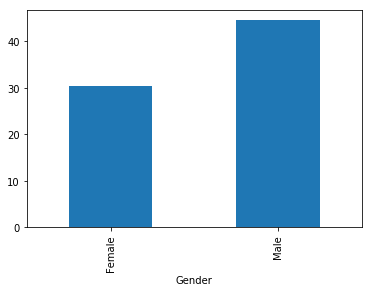

In [55]:
df_sum["%"].plot(kind="bar", y="%")

##### Department level summary

When examining the individual departments, it appeared that six out of 85 departments were significantly biased against men, whereas only four were significantly biased against women. In fact, the pooled and corrected data showed a "small but statistically significant bias in favor of women".[15] The data from the six largest departments are listed below, the top two departments by number of applicants for each gender italicised.

In [50]:
df_pivot = df.pivot_table(values="Freq", index=["Dept"], 
                          columns=["Gender", "Admit"])

df_pivot["%(Female)"] = 100*df_pivot["Female"]["Admitted"]/(df_pivot["Female"]["Rejected"] + df_pivot["Female"]["Admitted"])
df_pivot["%(Male)"] = 100*df_pivot["Male"]["Admitted"]/(df_pivot["Male"]["Rejected"] + df_pivot["Male"]["Admitted"])
df_pivot


Gender   Female              Male           %(Female)    %(Male)
Admit  Admitted Rejected Admitted Rejected                      
Dept                                                            
A            89       19      512      313  82.407407  62.060606
B            17        8      353      207  68.000000  63.035714
C           202      391      120      205  34.064081  36.923077
D           131      244      138      279  34.933333  33.093525
E            94      299       53      138  23.918575  27.748691
F            24      317       22      351   7.038123   5.898123

MultiIndex(levels=[['Female', 'Male', '%(Female)', '%(Male)'], ['Admitted', 'Rejected', '']],
           codes=[[2, 3], [2, 2]],
           names=['Gender', 'Admit'])
Index(['%(Female)', '%(Male)'], dtype='object')


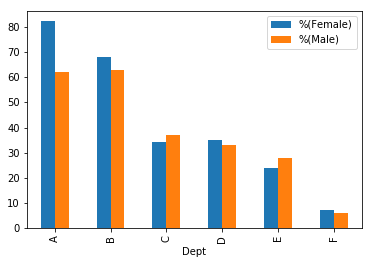

In [77]:
df_perc = df_pivot[["%(Female)",	"%(Male)"]]
print(df_perc.columns)
df_perc.columns = ['%(Female)', '%(Male)']
print(df_perc.columns)
df_perc
df_perc.plot(kind="bar")

The research paper by Bickel et al. concluded that __women tended to apply to competitive departments with low rates of admission even among qualified applicants__ (such as in the English Department), whereas __men__ tended to apply to __less-competitive departments__ with high rates of admission among the qualified applicants (such as in engineering and chemistry).

Gender   Female              Male           %(Female)    %(Male)
Admit  Admitted Rejected Admitted Rejected                      
Dept                                                            
A            89       19      512      313  82.407407  62.060606
B            17        8      353      207  68.000000  63.035714
C           202      391      120      205  34.064081  36.923077
D           131      244      138      279  34.933333  33.093525
E            94      299       53      138  23.918575  27.748691
F            24      317       22      351   7.038123   5.898123

In [12]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                   [7, 8, 9],
                    [np.nan, np.nan, np.nan]],
                   columns=['A', 'B', 'C'])
print(df)
df.agg(['sum', 'min'])


     A    B    C
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
3  NaN  NaN  NaN


,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [5]:
totals_dict = {}
totals_dict['Males'] = 0
totals_dict['Females'] = 0
for Gender, Freq in zip(df['Gender'], df['Freq']):
    if Gender =='Male':
        totals_dict['Males'] += Freq
    elif Gender == 'Female':
        totals_dict['Females'] += Freq
print("The total applicant numbers for each gender are {}.".format(totals_dict))



The total applicant numbers for each gender are {'Males': 2691, 'Females': 1835}.
